In [62]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
# from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pyodbc
import FinanceLib as fl
import numpy as np
from datetime import datetime
import seaborn as sns
style.use('ggplot')


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# fname  = 'C:/Users/40KravchukPV.REGION/Documents/Courses/FinanceProject Local/DB.config'
fname  = 'C:/Dev/Python/FinanceProject/DB.config'
config_dict = fl.ReadConnConfig(fname)
con = pyodbc.connect(driver = config_dict['DRIVER'],server = config_dict['SERVER'], port = config_dict['PORT'], database = config_dict['DATABASE'], UID = config_dict['UID'], PWD = config_dict['PWD'], autocommit=True)

In [7]:
tickers_list = ['ES', 'AAPL', 'AES', 'AIG']

In [8]:
df = fl.GetStockQuoteFromDB(con, tickers_list, IsDtIndex = 1, IsStockIndex = 0, DateFrom = 'NULL', DateTo = 'NULL')

In [17]:
df.head()

,Stock,OpenValue,HighValue,LowValue,CloseValue,AdjClose,Volume,LoadDt
Dt,,,,,,,,
2015-12-31,AAPL,26.752501,26.757500,26.205000,26.315001,24.380093,163649200.0,2021-01-28 19:49:35.147
2015-12-31,AES,9.500000,9.730000,9.370000,9.570000,7.774692,5060200.0,2021-01-28 19:55:02.120
2015-12-31,AIG,62.299999,62.740002,61.959999,61.970001,54.062973,4909600.0,2021-01-28 19:55:51.460
2015-12-31,ES,51.889999,51.900002,50.549999,51.070000,43.896469,2081200.0,2021-01-28 20:53:03.533
2016-01-04,AAPL,25.652500,26.342501,25.500000,26.337500,24.400942,270597600.0,2021-01-28 19:49:35.160


In [21]:
 df[df['Stock']=='AAPL']['AdjClose']

Dt
2015-12-31     24.380093
2016-01-04     24.400942
2016-01-05     23.789471
2016-01-06     23.323915
2016-01-07     22.339539
                 ...    
2021-03-09    121.089996
2021-03-10    119.980003
2021-03-11    121.959999
2021-03-12    121.029999
2021-03-15    123.989998
Name: AdjClose, Length: 1306, dtype: float64

In [23]:
data = fl.GetAdjCloseInCol(tickers_list, df)

In [24]:
data.head()

,ES,AAPL,AES,AIG
Dt,,,,
2015-12-31,43.896469,24.380093,7.774692,54.062973
2016-01-04,43.733162,24.400942,7.660959,52.719463
2016-01-05,44.137138,23.789471,7.766572,52.902676
2016-01-06,44.231693,23.323915,7.498477,52.126232
2016-01-07,43.956642,22.339539,7.311625,50.878693


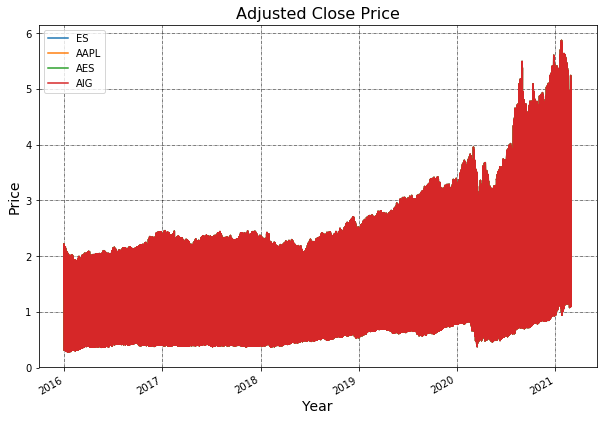

In [26]:
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))
# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k',  linestyle='-.', linewidth=0.5)
plt.show()

In [38]:
data.pct_change().sort_index(ascending=False).head(10)

,ES,AAPL
Dt,,
2021-01-29,-0.336920,-0.336920
2021-01-29,0.480368,0.480368
2021-01-28,-0.349770,-0.349770
2021-01-28,0.548515,0.548515
2021-01-27,-0.376813,-0.376813
2021-01-27,0.580376,0.580376
2021-01-26,-0.372101,-0.372101
2021-01-26,0.585558,0.585558
2021-01-25,0.635053,0.635053


In [27]:
df_change = df.drop(['OpenValue', 'HighValue', 'LowValue', 'CloseValue', 'Volume', 'LoadDt'], axis=1)

In [32]:
df_change['AdjClose'].pct_change().loc['2021-01-29']

Dt
2015-12-31         NaN
2015-12-31    0.800505
2016-01-04   -0.444125
2016-01-04    0.792274
2016-01-05   -0.456031
                ...   
2021-01-27   -0.376813
2021-01-28    0.548515
2021-01-28   -0.349770
2021-01-29    0.480368
2021-01-29   -0.336920
Name: AdjClose, Length: 2558, dtype: float64

In [ ]:
len(df_change.loc['2021-01-01':'2021-01-29'].index)

In [69]:
len(df_change.loc['2021-01-01':'2021-01-29'].groupby('Dt'))

19

In [28]:
df_change['Change'] = df_change.groupby('Stock').AdjClose.pct_change()
df_change['Change7'] = df_change.groupby('Stock').AdjClose.pct_change(7)
df_change['Change30'] = df_change.groupby('Stock').AdjClose.pct_change(30)
df_change['Change90'] = df_change.groupby('Stock').AdjClose.pct_change(90)
df_change['Change180'] = df_change.groupby('Stock').AdjClose.pct_change(180)
df_change['Change360'] = df_change.groupby('Stock').AdjClose.pct_change(360)

In [36]:
df_change.head()

,Stock,AdjClose,Change,Change7,Change30,Change90,Change180,Change360
Dt,,,,,,,,
2015-12-31,AAPL,24.380093,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,AES,7.774692,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,AIG,54.062973,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,ES,43.896469,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,AAPL,24.400942,0.000855,NaN,NaN,NaN,NaN,NaN


In [80]:
# df_change.loc['2021-01-27']
# pd.DatetimeIndex(df_change['Dt']).month

# df['purchase_date'].dt.floor('d') - pd.offsets.MonthBegin(1)
# df_change.index.floor('d')
# from datetime import date
# print(date(date.today().year, 1, 1))
# > date(date.today().year, 1, 1)
from datetime import datetime
from datetime import date
sum(i > date(date.today().year, 1, 1) for i in set(df_change.index))
sum(i > datetime.today().replace(day=1) for i in set(df_change.index))

2

In [75]:
date.today().month

3

In [85]:
len(df_change.loc['2021-03-01':'2021-03-03'].groupby('Dt'))

3

In [92]:
datetime.today().replace(day=1)

datetime.datetime(2021, 3, 1, 17, 30, 6, 468150)

In [88]:
sum(i >= datetime.today().replace(day=1) for i in set(df_change.index))

2

In [86]:
df_change.groupby('Stock').AdjClose.pct_change(len(df_change.loc['2021-03-01':'2021-03-03'].groupby('Dt')))

Dt
2015-12-31         NaN
2015-12-31         NaN
2015-12-31         NaN
2015-12-31         NaN
2016-01-04         NaN
                ...   
2021-03-02    0.001986
2021-03-03    0.006597
2021-03-03    0.012425
2021-03-03    0.069625
2021-03-03   -0.021389
Name: AdjClose, Length: 5192, dtype: float64

In [94]:
df_change.groupby('Stock').AdjClose.pct_change(sum(i >= date(df_change.index).replace(day=1) for i in set(df_change.index)))

TypeError: an integer is required (got type DatetimeIndex)

In [51]:
list(df_change.index) > date(date.today().year, 1, 1)

[Timestamp('2015-12-31 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 Timestamp('2016-01-04 00:00:00'),
 Timestamp('2016-01-04 00:00:00'),
 Timestamp('2016-01-04 00:00:00'),
 Timestamp('2016-01-04 00:00:00'),
 Timestamp('2016-01-05 00:00:00'),
 Timestamp('2016-01-05 00:00:00'),
 Timestamp('2016-01-05 00:00:00'),
 Timestamp('2016-01-05 00:00:00'),
 Timestamp('2016-01-06 00:00:00'),
 Timestamp('2016-01-06 00:00:00'),
 Timestamp('2016-01-06 00:00:00'),
 Timestamp('2016-01-06 00:00:00'),
 Timestamp('2016-01-07 00:00:00'),
 Timestamp('2016-01-07 00:00:00'),
 Timestamp('2016-01-07 00:00:00'),
 Timestamp('2016-01-07 00:00:00'),
 Timestamp('2016-01-08 00:00:00'),
 Timestamp('2016-01-08 00:00:00'),
 Timestamp('2016-01-08 00:00:00'),
 Timestamp('2016-01-08 00:00:00'),
 Timestamp('2016-01-11 00:00:00'),
 Timestamp('2016-01-11 00:00:00'),
 Timestamp('2016-01-11 00:00:00'),
 Timestamp('2016-01-11 00:00:00'),
 Timestamp('2016-01-

In [18]:
df_change['ActualYear'] = df_change.groupby('Stock').AdjClose.pct_change(len(df_change.loc['2021-01-01':'2021-01-31'].groupby('Dt')))
df_change['ActualMonth'] = df_change.groupby('Stock').AdjClose.pct_change(len(df_change.loc['2021-02-01':'2021-02-01'].groupby('Dt')))

In [101]:
def GetPctChange(df):
    df_change = df.drop(['OpenValue', 'HighValue', 'LowValue', 'CloseValue', 'Volume', 'LoadDt'], axis=1)
    
    df_change['Change'] = df_change.groupby('Stock').AdjClose.pct_change()
    df_change['Change7'] = df_change.groupby('Stock').AdjClose.pct_change(7)
    df_change['Change30'] = df_change.groupby('Stock').AdjClose.pct_change(30)
    df_change['Change90'] = df_change.groupby('Stock').AdjClose.pct_change(90)
    df_change['Change180'] = df_change.groupby('Stock').AdjClose.pct_change(180)
    df_change['Change360'] = df_change.groupby('Stock').AdjClose.pct_change(360)
    return df_change
#     df_change['ActualYear'] = df_change.groupby('Stock').AdjClose.pct_change(len(df_change.loc['2021-01-01':'2021-01-31'].groupby('Dt')))
#     df_change['ActualMonth'] = df_change.groupby('Stock').AdjClose.pct_change(len(df_change.loc['2021-02-01':'2021-02-01'].groupby('Dt')))
    

In [12]:
fl.GetPctChange(df).loc['2021-03-01']

,Stock,AdjClose,Change,Change7,Change30,Change90,Change180,Change360
Dt,,,,,,,,
2021-03-01,AAPL,127.790001,0.053851,-0.055995,-0.009226,0.056279,0.538311,1.340343
2021-03-01,AES,27.000000,0.016566,-0.053628,0.067484,0.394749,0.846039,0.776638
2021-03-01,AIG,45.310001,0.030944,0.094444,0.124876,0.540577,0.183098,-0.178645
2021-03-01,ES,80.730003,0.015727,-0.052131,-0.095057,-0.114941,-0.067588,0.002671


In [16]:
data.head()

,ES,AAPL,AES,AIG
Dt,,,,
2015-12-31,24.380093,24.380093,24.380093,24.380093
2015-12-31,7.774692,7.774692,7.774692,7.774692
2015-12-31,54.062973,54.062973,54.062973,54.062973
2015-12-31,43.896469,43.896469,43.896469,43.896469
2016-01-04,24.400942,24.400942,24.400942,24.400942


In [25]:
returns = data.pct_change()

In [26]:
returns.reset_index(drop=True, inplace=True)

In [27]:
returns

,ES,AAPL,AES,AIG
0,NaN,NaN,NaN,NaN
1,-0.003720,0.000855,-0.014629,-0.024851
2,0.009237,-0.025059,0.013786,0.003475
3,0.002142,-0.019570,-0.034519,-0.014677
4,-0.006218,-0.042205,-0.024919,-0.023933
...,...,...,...,...
1301,0.012900,0.040650,0.047565,-0.013125
1302,0.000367,-0.009167,-0.001453,0.026384
1303,-0.010528,0.016503,0.025100,0.003344
1304,0.015712,-0.007625,0.009581,0.008956


In [28]:
returns+1

,ES,AAPL,AES,AIG
0,NaN,NaN,NaN,NaN
1,0.996280,1.000855,0.985371,0.975149
2,1.009237,0.974941,1.013786,1.003475
3,1.002142,0.980430,0.965481,0.985323
4,0.993782,0.957795,0.975081,0.976067
...,...,...,...,...
1301,1.012900,1.040650,1.047565,0.986875
1302,1.000367,0.990833,0.998547,1.026384
1303,0.989472,1.016503,1.025100,1.003344
1304,1.015712,0.992375,1.009581,1.008956


In [29]:
np.prod(returns+1)

ES      1.885117
AAPL    5.085707
AES     3.665740
AIG     0.894142
dtype: float64

In [30]:
(((returns+1).prod()-1)*100).round(2)

ES       88.51
AAPL    408.57
AES     266.57
AIG     -10.59
dtype: float64

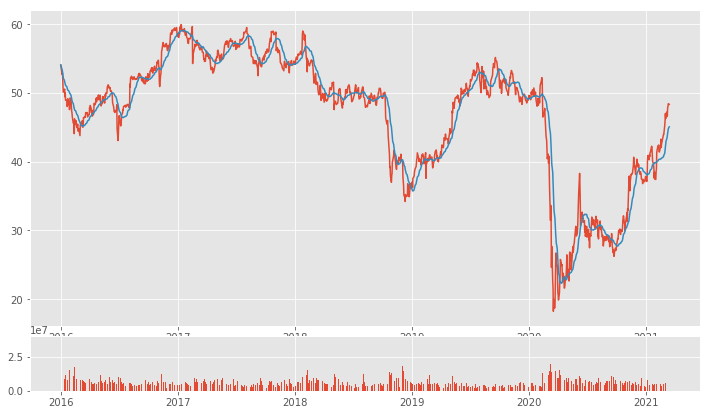

In [38]:
fl.GetMAPlot(df, 'AIG', 20)

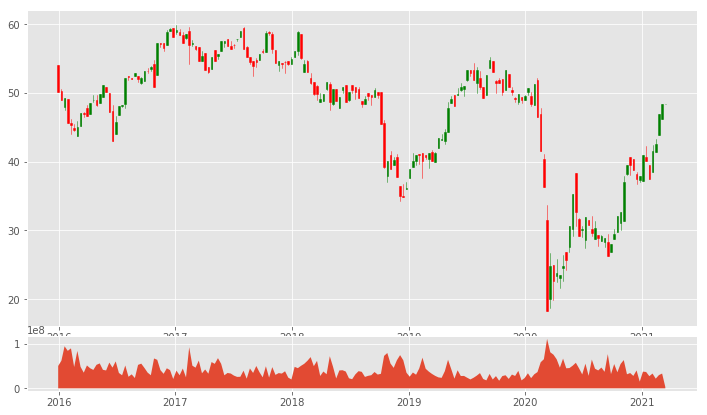

In [39]:
fl.GetCandlePlot(df, 'AIG', ReSample = '10D')

In [ ]:
fl.GetPctChange(df).loc['2021-03-01']

In [40]:
def GetTotalReturns(data):
    returns = data.pct_change()
    returns.reset_index(drop=True, inplace=True)
    return (((returns+1).prod()-1)*100).round(2)

In [55]:
stock_return = fl.GetReturns(data['2020'])

C:\Users\PETR\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


In [56]:
stock_return['AIG']

-23.72

In [59]:
returns = data.pct_change()

In [73]:
returns = fl.GetReturns(data)

In [74]:
returns.head()

,ES,AAPL,AES,AIG
Dt,,,,
2015-12-31,NaN,NaN,NaN,NaN
2016-01-04,-0.003720,0.000855,-0.014629,-0.024851
2016-01-05,0.009237,-0.025059,0.013786,0.003475
2016-01-06,0.002142,-0.019570,-0.034519,-0.014677
2016-01-07,-0.006218,-0.042205,-0.024919,-0.023933


C:\Users\PETR\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


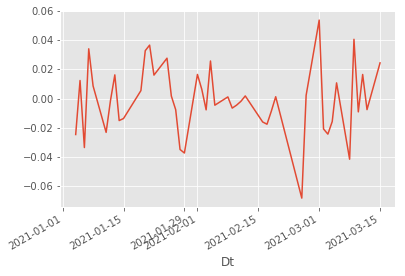

In [60]:
returns['2021']['AAPL'].plot()

In [ ]:
# ax = sns.barplot(x="day", y="total_bill", data=tips)

In [64]:
returns.std()

ES      0.015397
AAPL    0.019189
AES     0.021664
AIG     0.023372
dtype: float64

In [68]:
returns.shape

(1306, 4)

In [67]:
n_days =  returns.shape[0]
n_days

1306

In [69]:
annualized_return = (returns+1).prod()**(252/n_days) - 1
annualized_return

ES      0.130129
AAPL    0.368656
AES     0.284867
AIG    -0.021358
dtype: float64

In [70]:
annualized_vol = returns.std()*np.sqrt(252)
annualized_vol

ES      0.244414
AAPL    0.304621
AES     0.343900
AIG     0.371017
dtype: float64

In [71]:
annualized_return/annualized_vol

ES      0.532412
AAPL    1.210212
AES     0.828342
AIG    -0.057567
dtype: float64

In [72]:
riskfree_rate = 0.02
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

ES      0.450584
AAPL    1.144556
AES     0.770185
AIG    -0.111473
dtype: float64

In [75]:
fl.skewness(returns)

ES      0.437199
AAPL   -0.112323
AES    -0.663809
AIG    -0.574274
dtype: float64

In [76]:
fl.kurtosis(returns)

ES      25.326719
AAPL     9.726139
AES     14.352627
AIG     19.765662
dtype: float64

In [78]:
fl.compound(returns)

ES      0.885117
AAPL    4.085707
AES     2.665740
AIG    -0.105858
dtype: float64

In [79]:
periods_per_year = 252
riskfree_rate = 0.02

In [80]:
fl.annualize_rets(returns, periods_per_year)

ES      0.130129
AAPL    0.368656
AES     0.284867
AIG    -0.021358
dtype: float64

In [81]:
fl.annualize_vol(returns, periods_per_year)

ES      0.244414
AAPL    0.304621
AES     0.343900
AIG     0.371017
dtype: float64

In [82]:
fl.sharpe_ratio(returns, riskfree_rate, periods_per_year)

ES      0.441844
AAPL    1.122267
AES     0.755188
AIG    -0.109271
dtype: float64

In [84]:
fl.is_normal(returns)

ES      False
AAPL    False
AES     False
AIG     False
dtype: bool

In [20]:
pip install pandasgui

ERROR: spyder 4.1.3 has requirement pyqt5<5.13; python_version >= "3", but you'll have pyqt5 5.15.2 which is incompatible.
ERROR: spyder 4.1.3 has requirement pyqtwebengine<5.13; python_version >= "3", but you'll have pyqtwebengine 5.15.2 which is incompatible.


  Created wheel for pandasgui: filename=pandasgui-0.2.7-py3-none-any.whl size=6931296 sha256=4312843445fbcd2bf312ae334f726f8efbf716d6ee1a0140e1408cd2f74cbe54
  Stored in directory: c:\users\petr\appdata\local\pip\cache\wheels\06\79\30\fed1fa2d679573ad9e85a5ede31538f6a7b78dcf8ad4ab099e
Successfully built pandasgui


In [21]:
from pandasgui import show
gui = show(df_change)

In [1]:
pip install bamboolib


  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13055 sha256=0ba35f8032726f728fe4527d90e88f34769cebcbf1beb2478b55336b3eff9c2a
  Stored in directory: c:\users\petr\appdata\local\pip\cache\wheels\d2\3c\58\2ff786414b21713edc6f4fdb54fdee89ac37bca5edd1f60634
  Created wheel for qgrid: filename=qgrid-1.3.1-py2.py3-none-any.whl size=1761262 sha256=a5fa730a805cb98fa36971f0a22b4da4ddb618c9c3cad0aa0a8e80299fbfd179
  Stored in directory: c:\users\petr\appdata\local\pip\cache\wheels\53\87\cb\c63a58774627471976061afb5b8657b76d2268c1e76e980586
Successfully built ppscore qgrid
  Attempting uninstall: attrs
    Found existing installation: attrs 19.3.0
    Uninstalling attrs-19.3.0:
      Successfully uninstalled attrs-19.3.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
  Attempting uninstall: plotly
    Found existing installation: plotly 4.7.1
    Uninstalling plo

In [ ]:
jupyter nbextension enable --py qgrid --sys-prefix
jupyter nbextension enable --py widgetsnbextension --sys-prefix
jupyter nbextension install --py bamboolib --sys-prefix
jupyter nbextension enable --py bamboolib --sys-prefix

In [1]:
import bamboolib as bam
import pandas as pd
data = pd.read_csv(bam.titanic_csv)
bam.show(data)

In [ ]:
https://medium.com/nuances-of-programming/bamboolib-%D0%B8%D0%B7%D1%83%D1%87%D0%B0%D0%B9%D1%82%D0%B5-%D0%B8-%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D0%B9%D1%82%D0%B5-pandas-%D0%B1%D0%B5%D0%B7-%D0%BD%D0%B0%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D1%8F-%D0%BA%D0%BE%D0%B4%D0%B0-1ed405f6c92d
https://towardsdatascience.com/how-to-create-an-interactive-dropdown-in-jupyter-322277f58a68    